<a href="https://colab.research.google.com/github/hoops92/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module2-intermediate-linear-algebra/Copy_of_Scott_LS_DS_132_Intermediate_Linear_Algebra_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
# Importing the proper libraries
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [0]:
def Mean_Variance_Standard_Deviation(numbers):

    mvsd = {   
          'Mean': sum(numbers) / len(numbers), 
          'Variance': sum((xi - (sum(numbers) / len(numbers))) ** 2 for xi in numbers) / (len(numbers)-1),
          'Standard_Deviation': (sum((xi - (sum(numbers) / len(numbers))) ** 2 for xi in numbers) / (len(numbers) -1))**0.5
      
    }
     
    return mvsd
  
Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
print(Mean_Variance_Standard_Deviation(Sales))

{'Mean': 3052.714285714286, 'Variance': 214387.90476190473, 'Standard_Deviation': 463.0204150595357}


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
N_customers = [127, 80, 105, 92, 120, 115, 93] 
np.cov(Sales,N_customers)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [0]:
np.std(N_customers,ddof=1)

17.057326313123664

In [0]:
correlation_coefficient = 7604.35714286/(17.057326313123664*463.0204150595357)
correlation_coefficient

0.9628339778152527

In [0]:
# Verifying with pandas 

Sales = [3505, 2400, 3027, 2798, 3700, 3250, 2689]
N_customers = [127, 80, 105, 92, 120, 115, 93]
data = {"Sales": Sales, "N_customers": N_customers}
sales_df = pd.DataFrame(data)

In [0]:
# variance-covariance matrix
sales_df.cov()

,Sales,N_customers
Sales,214387.904762,7604.357143
N_customers,7604.357143,290.952381


In [0]:
# correlation matrix
sales_df.corr()

,Sales,N_customers
Sales,1.000000,0.962834
N_customers,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [0]:
df =pd.read_csv('https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv')
df.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [0]:
df.dtypes

Unnamed: 0            int64
pclass              float64
survived            float64
name                 object
sex                  object
age                 float64
sibsp               float64
parch               float64
ticket               object
fare                float64
cabin                object
embarked             object
boat                 object
body                float64
home.dest            object
has_cabin_number      int64
dtype: object

In [0]:
# variance-covariance matrix
df.cov() 

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,143117.500000,284.357034,-53.967125,-1442.939812,25.828746,1.172783,-9410.735123,591.579132,-95.438885
pclass,284.357034,0.701969,-0.127248,-3.954605,0.053090,0.013287,-24.227788,-2.876653,-0.249992
survived,-53.967125,-0.127248,0.236250,-0.314343,-0.014088,0.034776,6.146023,0.000000,0.061406
age,-1442.939812,-3.954605,-0.314343,165.850021,-2.559806,-1.459378,114.416613,81.622922,1.463138
sibsp,25.828746,0.053090,-0.014088,-2.559806,1.085052,0.336833,8.641768,-8.708471,-0.003946
parch,1.172783,0.013287,0.034776,-1.459378,0.336833,0.749195,9.928031,4.237190,0.013316
fare,-9410.735123,-24.227788,6.146023,114.416613,8.641768,9.928031,2678.959738,-179.164684,10.976961
body,591.579132,-2.876653,0.000000,81.622922,-8.708471,4.237190,-179.164684,9544.688567,3.625689
has_cabin_number,-95.438885,-0.249992,0.061406,1.463138,-0.003946,0.013316,10.976961,3.625689,0.174613


In [0]:
# correlation matrix
df.corr()

,Unnamed: 0,pclass,survived,age,sibsp,parch,fare,body,has_cabin_number
Unnamed: 0,1.000000,0.897822,-0.293717,-0.296172,0.065594,0.003584,-0.481215,0.015558,-0.603727
pclass,0.897822,1.000000,-0.312469,-0.366370,0.060832,0.018322,-0.558629,-0.034642,-0.713857
survived,-0.293717,-0.312469,1.000000,-0.050199,-0.027825,0.082660,0.244265,NaN,0.302250
age,-0.296172,-0.366370,-0.050199,1.000000,-0.190747,-0.130872,0.171892,0.059059,0.271887
sibsp,0.065594,0.060832,-0.027825,-0.190747,1.000000,0.373587,0.160238,-0.099961,-0.009064
parch,0.003584,0.018322,0.082660,-0.130872,0.373587,1.000000,0.221539,0.051099,0.036806
fare,-0.481215,-0.558629,0.244265,0.171892,0.160238,0.221539,1.000000,-0.043110,0.507253
body,0.015558,-0.034642,NaN,0.059059,-0.099961,0.051099,-0.043110,1.000000,0.083796
has_cabin_number,-0.603727,-0.713857,0.302250,0.271887,-0.009064,0.036806,0.507253,0.083796,1.000000


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


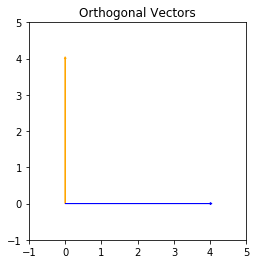

In [0]:
vector_1 = [0, 4]
vector_2 = [4, 0]

# Plot the Scaled Vectors
plt.arrow(0,0, vector_1[0], vector_1[1],head_width=.05, head_length=0.05, color ='orange')
plt.arrow(0,0, vector_2[0], vector_2[1],head_width=.05, head_length=0.05, color ='blue')
plt.xlim(-1,5)          
plt.ylim(-1,5)
plt.axes().set_aspect('equal')
plt.title("Orthogonal Vectors")
plt.show()

### Orthogonal is a synonym for perpendicular

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [0]:
vector_a = np.array([[-5],[3],[7]])
vector_b = np.array([[6],[-8],[2]])
print (vector_a*vector_b)            

[[-30]
 [-24]
 [ 14]]


### They are not orthogonal to each other because their dot product is different of zero.

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
import numpy as np
c = np.array([2,-15,6,20])

In [3]:
# The dot product of a vector c with itself is equal to Euclidean vector c raised to the 2nd power.
(np.linalg.norm(c))**2

665.0

In [5]:
# The dot product of a vector c with itself
np.vdot(c,c)

665

In [6]:
# The dot product of the transpose of vector c with vector c
cT = c.T
np.vdot(cT,c)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix} = 7\begin{bmatrix} 1 \\ 0 \end{bmatrix} + 12\begin{bmatrix} 0 \\ 1 \end{bmatrix} = 7\hat{i} + 12\hat{j}
\end{align}


\begin{align}
 e= \begin{bmatrix} 2 \\ 11 \\ -8 \end{bmatrix} = 2\begin{bmatrix} 1 \\ 0 \\ 0\end{bmatrix} + 11\begin{bmatrix} 0 \\ 1\\0 \end{bmatrix} + -8\begin{bmatrix} 0 \\ 0\\1 \end{bmatrix} = 2\hat{i} + 11\hat{j} + -8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [0]:
# Find magnitude and divide the vectory by the magnitude
f = np.array([4,12,11,9,2])
magnitude = np.linalg.norm(f)
print(magnitude)
f_unit_vector = np.divide(f, magnitude)
f_unit_vector

19.131126469708992


array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

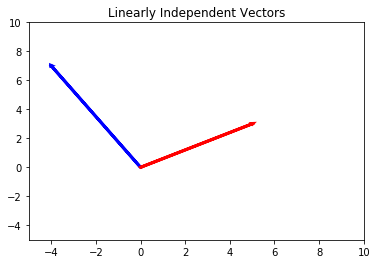

In [7]:
# Independent
import matplotlib.pyplot as plt

plt.xlim(-5,10)          
plt.ylim(-5,10)

#Vectors
a = [-4,7] #blue 
b = [5, 3] #red

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

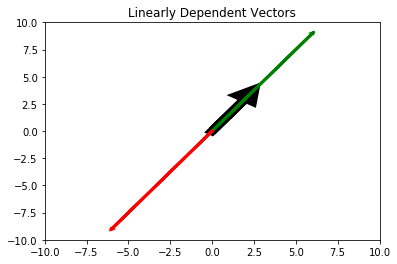

In [8]:
# Dependent

plt.xlim(-10,10)          
plt.ylim(-10,10)

#Vector
c = [2,3] 

# Scaled Vectors
c2 = np.multiply(3, c)
c3 = np.multiply(-3,c)

# Get Vals
#axes = plt.gca()
#x_vals = np.array(axes.get_xlim())
#y_vals = 0*x_vals

# Plot Vectors and L
#plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, c[0], c[1], linewidth=9, head_width=1, head_length=1, color ='black')
plt.arrow(0,0, c2[0], c2[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, c3[0], c3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [0]:
g = np.array([1, 2])
h = np.array([4, 8])
g_span = np.linalg.matrix_rank(g)
print(g_span)
h_span = np.linalg.matrix_rank(h)
print(h_span)

1
1


## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [0]:
lmn = np.array([[1,2,3], [-1,0,7], [4,8,2]])
lmn
lmn_span = np.linalg.matrix_rank(lmn)
lmn_span

3

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



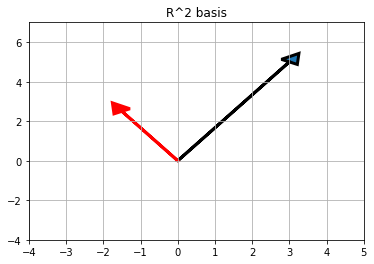

In [0]:
x = 3
x2 = -x/2
y = 5
y2 = y/2
plt.grid()
plt.arrow(0,0,x,y, linewidth=3, head_width=0.5, head_length=0.5)
plt.arrow(0,0,x2, y2, color = 'r', linewidth=3, head_width=0.5, head_length=0.5)
plt.title('R^2 basis')
plt.xlim(-4, 5)
plt.ylim(-4, 7)
plt.show()

## 6.2 What does it mean to form a basis?

### Is linearly independent and spans the space of the graph.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

In [0]:
# Rank of P
p = np.array([[1,2,3], [-1,0,7], [4,8,2]])
p_rank = np.linalg.matrix_rank(p)
p_rank

3

## 7.2 What does the rank of a matrix tell us?

### Dimension of the vector space spanned by its columns.

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

\begin{align}
proj_{L}(w) =  \frac{w \cdot v}{v \cdot v}v
\end{align}

In [0]:
# Using this equaton to calculate the projection. 
# Making the vectors above onto a line.

v = np.array([1,3])
w = np.array([-1,2])
w_v_dot = np.vdot(w,v)
v_v_dot = np.vdot(v,v)
wv_vv = np.divide(w_v_dot, v_v_dot)
projection = np.multiply(wv_vv, v)
projection

array([0.5, 1.5])

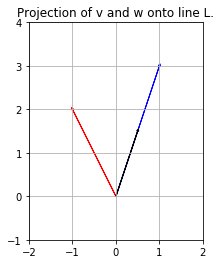

In [0]:
v = [1,3]
w = [-1,2]
p= [0.5, 1.5]


plt.axes().set_aspect('equal')

plt.grid()
plt.arrow(0,0, v[0], v[1], linewidth=1, 
          head_width=0.05, head_length=0.05, color = 'b')
plt.arrow(0,0, w[0], w[1], color = 'r', 
          linewidth=1, head_width=0.05, head_length=0.05)
plt.arrow(0,0, p[0], p[1],linewidth=1, 
          head_width=0.05, head_length=0.05)

plt.title('Projection of v and w onto line L.')
plt.xlim(-2, 2)
plt.ylim(-1, 4)
plt.show();

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

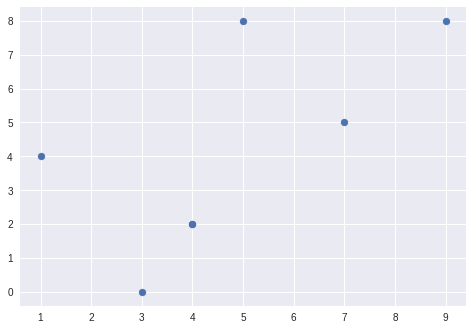

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()